In [27]:
import sklearn.svm as svm
import numpy as np
from sklearn.model_selection import KFold
import random as rand
import matplotlib.pyplot as plt

In [7]:
train = np.loadtxt(fname = "C:\\Users\\Spencer\\Downloads\\features.train.final.txt")
test = np.loadtxt(fname = "C:\\Users\\Spencer\\Downloads\\features.test.final.txt")

In [8]:
def points_w_bias(pts):
    points = []
    for i in range(len(pts)):
        x_coord = pts[i][0]
        y_coord = pts[i][1]
        point = (1, x_coord, y_coord)
        points.append(point)
    return points

In [9]:
def points(num):
    points = []
    for i in range(num):
        x_coord = rand.uniform(-1, 1)
        y_coord = rand.uniform(-1, 1)
        point = (x_coord, y_coord)
        points.append(point)
    return points

In [10]:
def point_generator(num):
    for i in range(num):
        x_coord = rand.uniform(-1, 1)
        y_coord = rand.uniform(-1, 1)
        point = (x_coord, y_coord)
    return point

In [11]:
def one_verses_all(num):
    y = []
    X = []
    for i in range(len(train)):
        if train[i][0] == num:
            y.append(1)
        else:
            y.append(-1)
    for j in range(len(train)):
        X.append([train[j][1], train[j][2]])
    return(X, y)

In [12]:
def one_verses_one_train(num1, num2):
    y = []
    X = []
    for i in range(len(train)):
        if train[i][0] == num1:
            y.append(1)
        if train[i][0] == num2:
            y.append(-1)
    for j in range(len(train)):
        if train[j][0] == num1 or train[j][0] == num2:
            X.append([train[j][1], train[j][2]])
    return(X, y)

In [13]:
def one_verses_one_test(num1, num2):
    y = []
    X = []
    for i in range(len(test)):
        if test[i][0] == num1:
            y.append(1)
        if test[i][0] == num2:
            y.append(-1)
    for j in range(len(test)):
        if test[j][0] == num1 or test[j][0] == num2:
            X.append([test[j][1], test[j][2]])
    return(X, y)

In [14]:
def one_verses_all_test(num):
    y = []
    X = []
    for i in range(len(test)):
        if test[i][0] == num:
            y.append(1)
        else:
            y.append(-1)
    for j in range(len(test)):
        X.append([test[j][1], test[j][2]])
    return(X, y)

In [15]:
def regression_with_decay(training_pts, labels, k, transform):
    missclassified = 0
    if transform == True:
        training_pts = np.asarray(nonlinear_transform(training_pts))
    else:
        training_pts = np.asarray(training_pts)
    pseudo_inverse = np.linalg.pinv(training_pts)
    y = np.asarray(labels)
    col = training_pts.shape[1]
    inner_term = np.linalg.inv((np.matmul(training_pts.T, training_pts) + 10**k * np.identity(col)))
    x = np.matmul(training_pts.T, training_pts)
    intermed = np.matmul(inner_term, training_pts.T)
    w = np.matmul(intermed, y)
    for i in range(len(training_pts)):
        if np.sign(w.dot(training_pts[i])) != labels[i]:
            missclassified += 1
    return (w, missclassified / len(training_pts)) 

In [16]:
def nonlinear_transform(pts):
    transformation = []
    for pt in pts:
        x1 = pt[0]
        x2 = pt[1]
        transformation.append([1, x1, x2, x1 * x2, x1 ** 2, x2 ** 2])
    return transformation

In [17]:
def error(w, pts, labels, transform):
    e_out = 0
    missclassified = 0
    if transform == True:
        transformed = np.asarray(nonlinear_transform(pts))
    else:
        transformed = np.asarray(pts)
    for i in range(len(pts)):
        if np.sign(w.dot(transformed[i])) != labels[i]:
            missclassified += 1
    e_out = missclassified / len(pts)
    return e_out

Problem 7

In [76]:
e_in = []
for i in range(10):
    data = one_verses_all(i)
    lin_reg = regression_with_decay(data[0], data[1], 0, False)
    e_in_sample = lin_reg[1]
    e_in.append((e_in_sample, i))
e_in

[(0.22946097928953504, 0),
 (0.137704018653134, 1),
 (0.10026059525442327, 2),
 (0.09024825126868742, 3),
 (0.08942531888629818, 4),
 (0.07625840076807022, 5),
 (0.09107118365107666, 6),
 (0.08846523110684405, 7),
 (0.07433822520916199, 8),
 (0.08832807570977919, 9)]

In [77]:
e_out = []
for i in range(10):
    data = one_verses_all(i)
    test_data = one_verses_all_test(i)
    lin_reg = regression_with_decay(data[0], data[1], 0, False)
    e_out_sample = error(lin_reg[0], test_data[0], test_data[1], False)
    e_out.append((e_out_sample, i))

In [78]:
e_in_trans = []
for i in range(10):
    data = one_verses_all(i)
    lin_reg = regression_with_decay(data[0], data[1], 0, True)
    e_in_sample = lin_reg[1]
    e_in_trans.append((e_in_sample, i))

Problem 8

In [79]:
e_out_trans = []
for i in range(10):
    data = one_verses_all(i)
    test_data = one_verses_all_test(i)
    lin_reg = regression_with_decay(data[0], data[1], 0, True)
    e_out_sample = error(lin_reg[0], test_data[0], test_data[1], True)
    e_out_trans.append((e_out_sample, i))
e_out_trans

[(0.10662680617837568, 0),
 (0.02192326856003986, 1),
 (0.09865470852017937, 2),
 (0.08271051320378675, 3),
 (0.09965122072745392, 4),
 (0.07922272047832586, 5),
 (0.08470353761833582, 6),
 (0.07324364723467862, 7),
 (0.08271051320378675, 8),
 (0.08819133034379671, 9)]

Problem 9

In [80]:
fit_0 = (e_in[0], e_out[0])
fit_9 = (e_in[9], e_out[9])
fit_0_t = (e_in_trans[0], e_out_trans[0])
fit_9_t = (e_in_trans[9], e_out_trans[9])
fit_5 = (e_out[5], e_out_trans[5])
(fit_0, fit_0_t, fit_9, fit_9_t, fit_5)

(((0.22946097928953504, 0), (0.22770303936223218, 0)),
 ((0.10231792621039638, 0), (0.10662680617837568, 0)),
 ((0.08832807570977919, 9), (0.08819133034379671, 9)),
 ((0.08832807570977919, 9), (0.08819133034379671, 9)),
 ((0.07972097658196313, 5), (0.07922272047832586, 5)))

Problem 10

In [19]:
reg = [0, -2]
e_in_1v5 = []
e_out_1v5 = []
for i in range(2):
    data = one_verses_one_train(1, 5)
    test_data = one_verses_one_test(1, 5)
    lin_reg = regression_with_decay(data[0], data[1], reg[i], True)
    e_in_sample = lin_reg[1]
    e_in_1v5.append((e_in_sample, i))
    e_out_sample = error(lin_reg[0], test_data[0], test_data[1], True)
    e_out_1v5.append((e_out_sample, i))
(e_in_1v5, e_out_1v5)

([(0.005124919923126201, 0), (0.004484304932735426, 1)],
 [(0.025943396226415096, 0), (0.02830188679245283, 1)])

In [48]:
def classifier(points):
    labels = []
    label = 0
    for i in range(len(points)):
        label = np.sign(points[i][1] - points[i][0] + np.sin(np.pi * points[i][0]))
        labels.append(label)
    return labels

In [49]:
def kmeans(pts, k):
    empty = 1
    while empty == 1:
        empty = 0
        centers = []
        for i in range(k):
            centers.append(point_generator(1))
        old_centers = []
        while centers != old_centers:
            old_centers = centers
            clusters = [[] for i in range(k)]
            for i in range(len(pts)):
                a = np.asarray(pts[i])
                min_dist = 100
                cluster = k + 1
                for j in range(len(centers)):
                    b = np.asarray(centers[j])
                    dist = np.linalg.norm(a - b)
                    if dist < min_dist:
                        min_dist = dist
                        cluster = j
                clusters[cluster].append(pts[i])
            for e in range(len(clusters)):
                if len(clusters[e]) == 0:
                    empty = 1
            if empty == 1:
                break
                
            centers = []
            for l in range(len(clusters)):
                avg_x = 0
                avg_y = 0
                for m in range(len(clusters[l])):
                    avg_x += clusters[l][m][0]
                    avg_y += clusters[l][m][1]
                centers.append((avg_x / len(clusters[l]), avg_y / len(clusters[l])))
    return (centers)      

In [50]:
def get_matrix(pts, centers, gamma):
    matrix = [[] for i in range(len(pts))]
    for i in range(len(pts)):
        matrix[i].append(1)
        for j in range(len(centers)):
            a = np.asarray(pts[i])
            b = np.asarray(centers[j])
            dist = np.linalg.norm(a - b)
            matrix[i].append(np.exp(-gamma * dist**2))
    return(matrix)

In [51]:
def normal_rbf(pts, labels, k, gamma):
    misclassified = 0
    points = points_w_bias(pts)
    centers = kmeans(pts, k)
    matrix = get_matrix(pts, centers, gamma)
    pseudo_inverse = np.linalg.pinv(matrix)
    y = np.asarray(labels)
    w = np.matmul(pseudo_inverse, y)
    guess = np.matmul(matrix, w)
    for i in range(len(guess)):
        if np.sign(guess[i]) != y[i]:
            misclassified += 1
    return (w, misclassified / len(pts), centers) 

Problem 13

In [401]:
non = 0
for i in range(10000):
    pts = points(100)
    labels = classifier(pts)
    clf = svm.SVC(C = 10**8, kernel = 'rbf', coef0 = 1, gamma = 1.5)
    clf.fit(pts, labels)
    score = abs(clf.score(pts, labels) - 1)
    if score != 0.0:
        non += 1

In [402]:
non

0

Problem 14

In [54]:
wins = 0
iters = 0
for i in range(100):
    no_count = 0
    iters += 1
    misclassified = 0
    pts = points(100)
    labels = classifier(pts)
    normal = normal_rbf(pts, labels, 9, 1.5)
    clf = svm.SVC(C = 10**8, kernel = 'rbf', coef0 = 1, gamma = 1.5)
    clf.fit(pts, labels)
    if abs(clf.score(pts, labels) - 1) != 0:
        no_count = 1
        iters -= 1
    test_pts = points(100)
    test_labels = classifier(test_pts)
    score = abs(clf.score(test_pts, test_labels) - 1)
    matrix = get_matrix(test_pts, normal[2], 1.5)
    guess = np.matmul(matrix, normal[0])
    for i in range(len(guess)):
        if np.sign(guess[i]) != test_labels[i]:
            misclassified += 1
    error = misclassified / len(test_pts)
    if score < error and no_count == 0:
        wins += 1
wins / iters

0.96

Problem 15

In [435]:
wins = 0
iters = 0
for i in range(100):
    no_count = 0
    iters += 1
    misclassified = 0
    pts = points(100)
    labels = classifier(pts)
    normal = normal_rbf(pts, labels, 12, 1.5)
    clf = svm.SVC(C = 10**8, kernel = 'rbf', coef0 = 1, gamma = 1.5)
    clf.fit(pts, labels)
    if abs(clf.score(pts, labels) - 1) != 0:
        no_count = 1
        iters -= 1
    test_pts = points(100)
    test_labels = classifier(test_pts)
    score = abs(clf.score(test_pts, test_labels) - 1)
    matrix = get_matrix(test_pts, normal[2], 1.5)
    guess = np.matmul(matrix, normal[0])
    for i in range(len(guess)):
        if np.sign(guess[i]) != test_labels[i]:
            misclassified += 1
    error = misclassified / len(test_pts)
    if score < error and no_count == 0:
        wins += 1
wins / iters

0.72

Problem 16

In [64]:
both_up = 0
both_down = 0
in_up_out_down = 0
out_up_in_down = 0
same = 0
for i in range(100):
    misclassified9 = 0
    misclassified12 = 0
    pts = points(100)
    labels = classifier(pts)
    normal9 = normal_rbf(pts, labels, 9, 1.5)
    e_in9 = normal9[1]
    normal12 = normal_rbf(pts, labels, 12, 1.5)
    e_in12 = normal12[1]
    test_pts = points(100)
    test_labels = classifier(test_pts)
    matrix12 = get_matrix(test_pts, normal12[2], 1.5)
    guess12 = np.matmul(matrix12, normal12[0])
    for i in range(len(guess)):
        if np.sign(guess12[i]) != test_labels[i]:
            misclassified12 += 1
    error12 = misclassified12 / len(test_pts)
    matrix9 = get_matrix(test_pts, normal9[2], 1.5)
    guess9 = np.matmul(matrix9, normal9[0])
    for i in range(len(guess)):
        if np.sign(guess9[i]) != test_labels[i]:
            misclassified9 += 1
    error9 = misclassified9 / len(test_pts)
    if error9 < error12 and e_in9 < e_in12:
        both_up += 1
    elif error9 > error12 and e_in9 > e_in12:
        both_down += 1
    elif error9 > error12 and e_in9 < e_in12:
        in_up_out_down += 1
    elif error9 < error12 and e_in9 > e_in12:
        out_up_in_down += 1
    elif error9 == error12 and e_in9 == e_in12:
        same += 1
(both_up, both_down, in_up_out_down, out_up_in_down, same) 

(6, 81, 1, 6, 0)

Problem 17

In [60]:
both_up = 0
both_down = 0
in_up_out_down = 0
out_up_in_down = 0
same = 0
for i in range(100):
    misclassified15 = 0
    misclassified2 = 0
    pts = points(100)
    labels = classifier(pts)
    normal15 = normal_rbf(pts, labels, 9, 1.5)
    e_in15 = normal15[1]
    normal2 = normal_rbf(pts, labels, 9, 2)
    e_in2 = normal2[1]
    test_pts = points(100)
    test_labels = classifier(test_pts)
    matrix2 = get_matrix(test_pts, normal2[2], 2)
    guess2 = np.matmul(matrix2, normal2[0])
    for i in range(len(guess)):
        if np.sign(guess2[i]) != test_labels[i]:
            misclassified2 += 1
    error2 = misclassified2 / len(test_pts)
    matrix15 = get_matrix(test_pts, normal15[2], 1.5)
    guess15 = np.matmul(matrix15, normal15[0])
    for i in range(len(guess)):
        if np.sign(guess15[i]) != test_labels[i]:
            misclassified15 += 1
    error15 = misclassified15 / len(test_pts)
    if error15 < error2 and e_in15 < e_in2:
        both_up += 1
    elif error15 > error2 and e_in15 > e_in2:
        both_down += 1
    elif error15 > error2 and e_in15 < e_in2:
        in_up_out_down += 1
    elif error15 < error2 and e_in15 > e_in2:
        out_up_in_down += 1
    else:
        same += 1
(both_up, both_down, in_up_out_down, out_up_in_down, same) 

(47, 21, 3, 12, 17)

Problem 18 

In [450]:
e_in0 = 0
for i in range(100):
    pts = points(100)
    labels = classifier(pts)
    normal = normal_rbf(pts, labels, 9, 1.5)
    if normal[1] == 0:
        e_in0 += 1
e_in0 / 1000

0.0

In [37]:
points_q11 = [(1, 0), (0, 1), (0, -1), (-1, 0), (0, 2), (0, -2), (-2, 0)]
y_q11 = [-1, -1, -1, 1, 1, 1, 1]
weights = [(-1, 1), (1, -1), (1, 0), (0,1)]

Problem 12

In [63]:
clf = svm.SVC(C = 10**6, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
clf.fit(points_q11, y_q11)
(abs(clf.dual_coef_), len(clf.support_vectors_))

(array([[0.59647182, 0.81065085, 0.8887034 , 0.20566488, 0.31275439]]), 5)

In [24]:
def q11_transform(pts):
    trans = []
    for pt in pts:
        z1 = pt[1]**2 - 2 * pt[0] - 1
        z2 = pt[0]**2 - 2 * pt[1] + 1
        trans.append((z1,z2))
    return trans

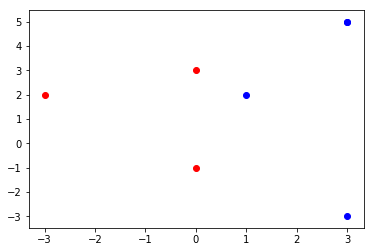

In [35]:
point = q11_transform(points_q11)
x = []
y = []
for pt in point:
    x.append(pt[0])
    y.append(pt[1])
plt.scatter(x[:3],y[:3], color = 'red')
plt.scatter(x[3:],y[3:], color = 'blue')
plt.show()

Problem 11

In [40]:
point = q11_transform(points_q11)
total_margin = []
for weight in weights:
    margin = 0
    for i in range(len(point)):
        margin += (weight[0] * point[i][0] + weight[1] * point[i][1] - 0.5) * y_q11[i]
    total_margin.append(margin)
total_margin

[-8.5, 7.5, 12.5, 4.5]